<a href="https://colab.research.google.com/github/ghanalk1/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Step 1. Importing the Dataset**



In [2]:
path = '/content/drive/MyDrive/dat/framingham.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# checking null values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# distribution of target variable
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

## Nominal columns in the dataset: male, currentSmoker, BPMeds, prevalentStroke, diabetes, TenYearCHD (target)

# **Step 2. EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f454ebf9cd0>,
      dtype=object)

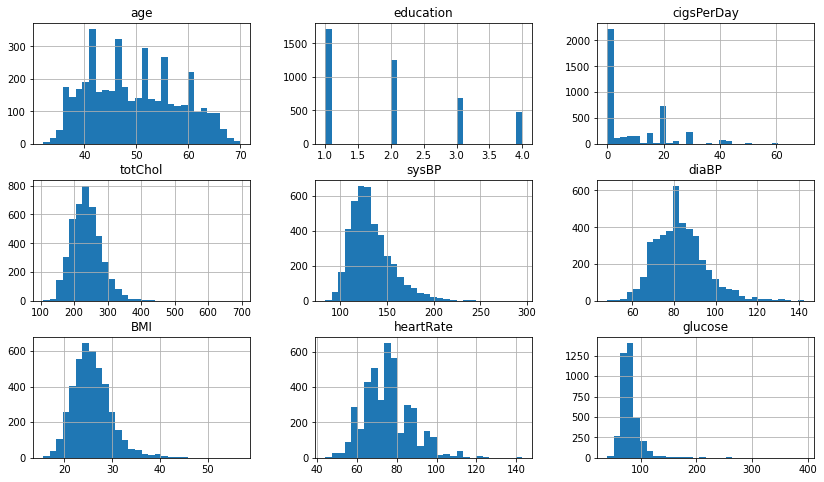

In [8]:
# distribution of columns (apart from nominal columns)
df.loc[:, ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].hist(figsize=[14,8], bins=30)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


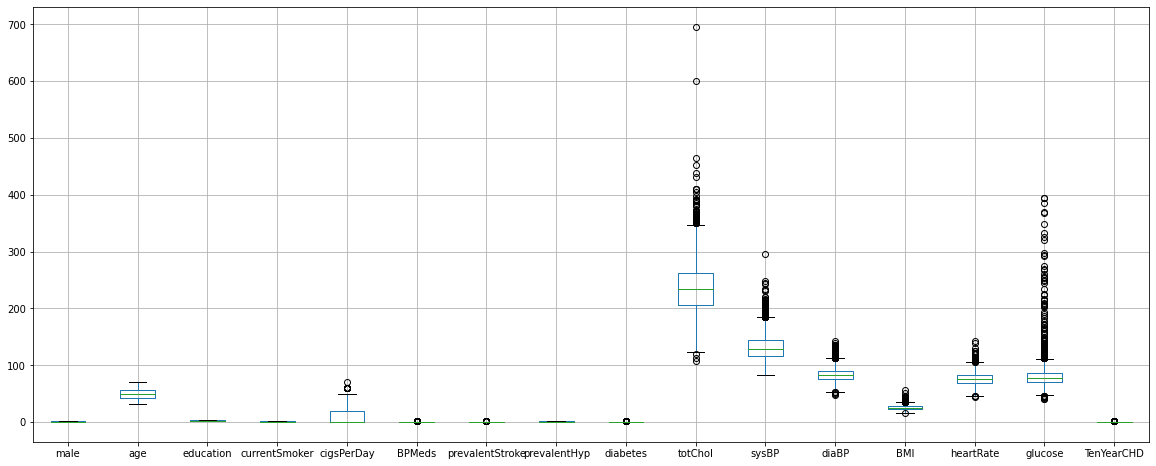

In [9]:
# outliers
df.boxplot(figsize=[20,8])

# Effect of systolic and diastolic blood pressure on heart disease with increasing age

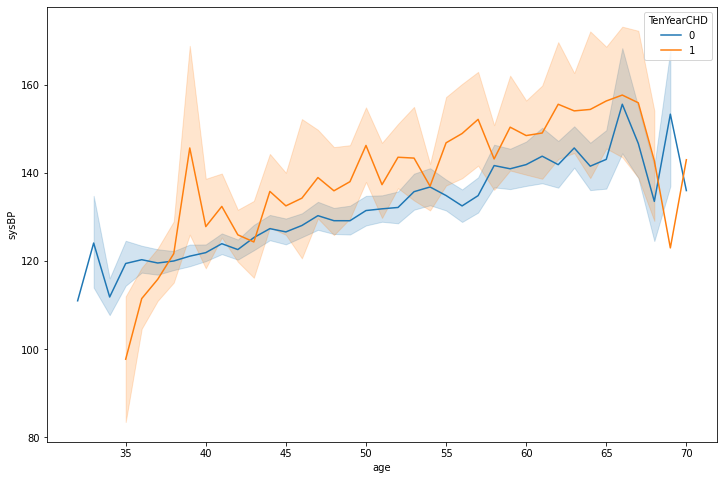

In [10]:
plt.figure(figsize=[12,8])
sns.lineplot(data=df, x='age', y='sysBP', hue='TenYearCHD')

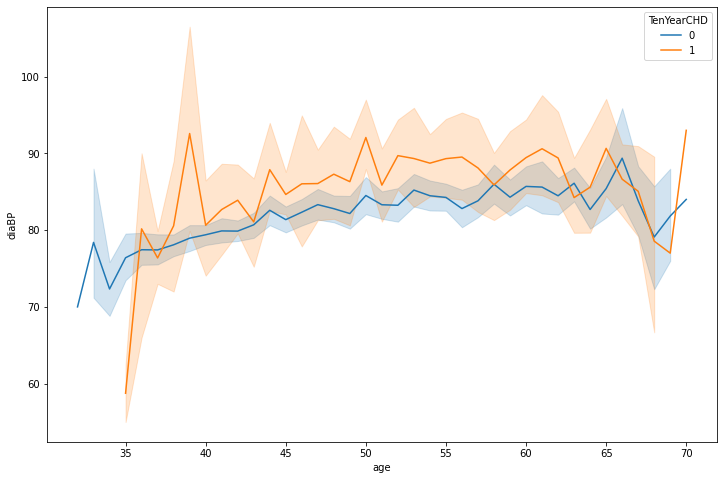

In [11]:
plt.figure(figsize=[12,8])
sns.lineplot(data=df, x='age', y='diaBP', hue='TenYearCHD')

# Effect of prevalent hypertension and stroke on Heart disease

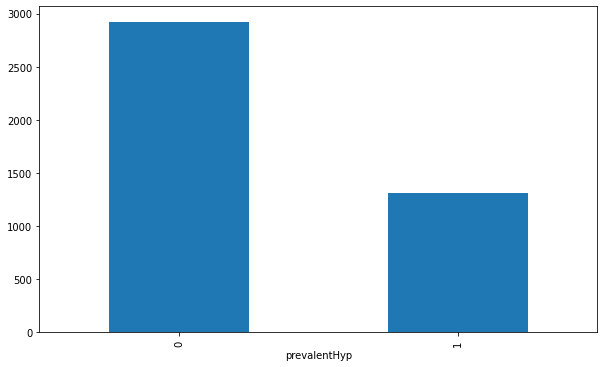

In [12]:
hypertension = df.groupby('prevalentHyp')['TenYearCHD'].count()
hypertension.plot(kind='bar', figsize=[10,6])

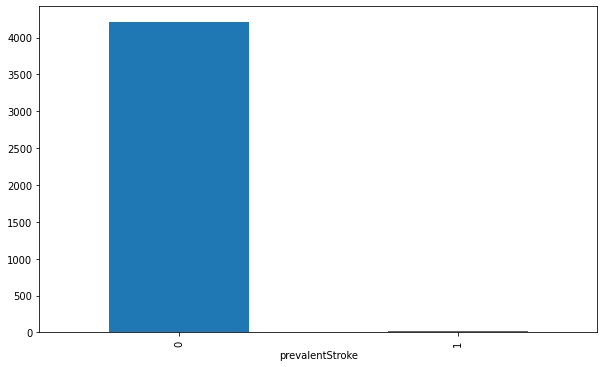

In [13]:
stroke = df.groupby('prevalentStroke')['TenYearCHD'].count()
stroke.plot(kind='bar', figsize=[10,6])

# Effect of diabetes on Heart disease for male and female

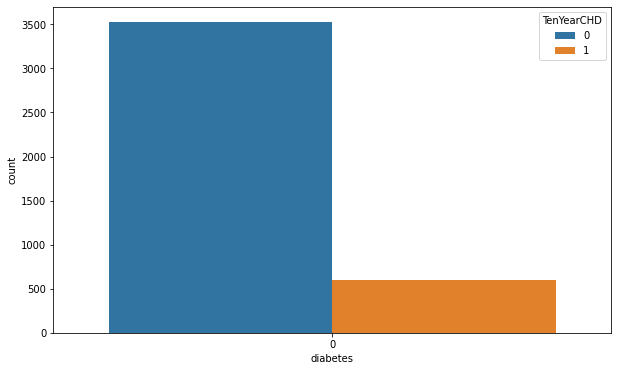

In [14]:
plt.figure(figsize=[10,6])
sns.countplot(data=df[df['diabetes']==0], x='diabetes', hue='TenYearCHD')

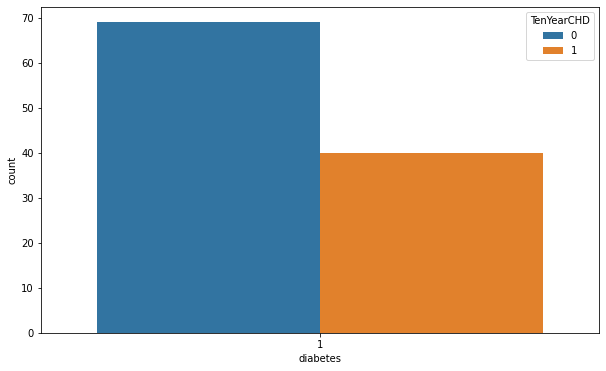

In [15]:
plt.figure(figsize=[10,6])
sns.countplot(data=df[df['diabetes']==1], x='diabetes', hue='TenYearCHD')

# Effect of Heartrate, BMI on Heart disease for male and female

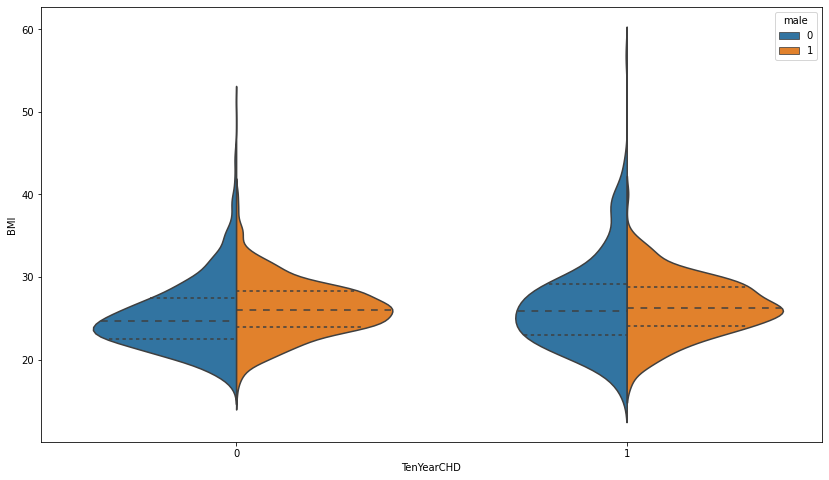

In [16]:
plt.figure(figsize=[14,8])
sns.violinplot(data=df, x='TenYearCHD', y='BMI', hue='male', inner='quartile', split=True)

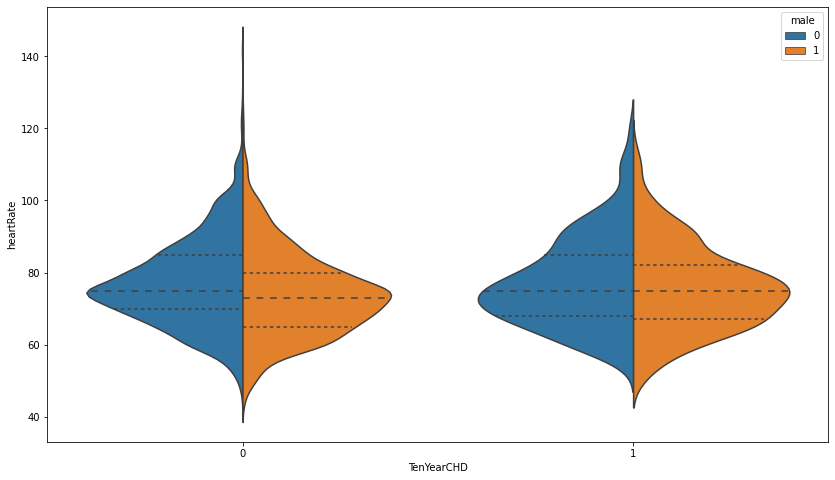

In [17]:
plt.figure(figsize=[14,8])
sns.violinplot(data=df, x='TenYearCHD', y='heartRate', hue='male', inner='quartile', split=True)

# Effect of glucose, total cholestrole on Heart disease for male and female

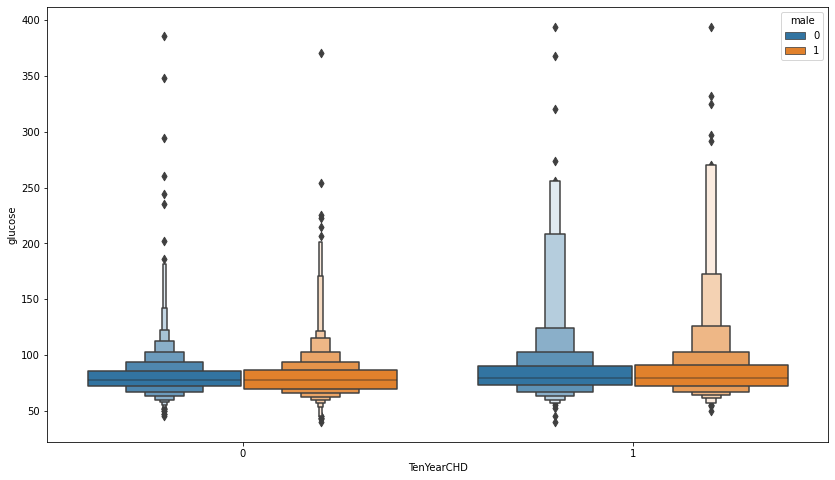

In [18]:
plt.figure(figsize=[14,8])
sns.boxenplot(data=df, x='TenYearCHD', y='glucose', hue='male')

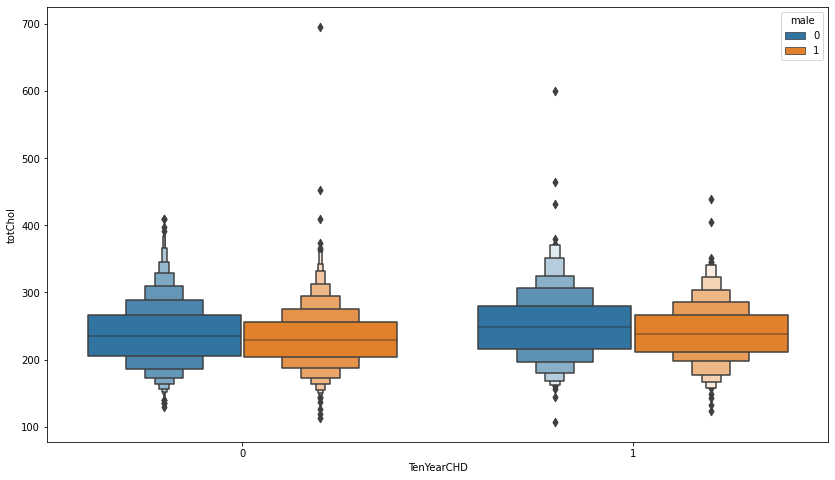

In [19]:
plt.figure(figsize=[14,8])
sns.boxenplot(data=df, x='TenYearCHD', y='totChol', hue='male')

# Current Smoker, cigerettes per day and BPmeds

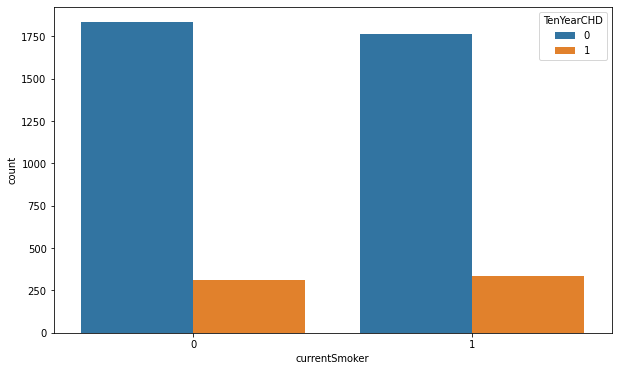

In [20]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, x='currentSmoker', hue='TenYearCHD')

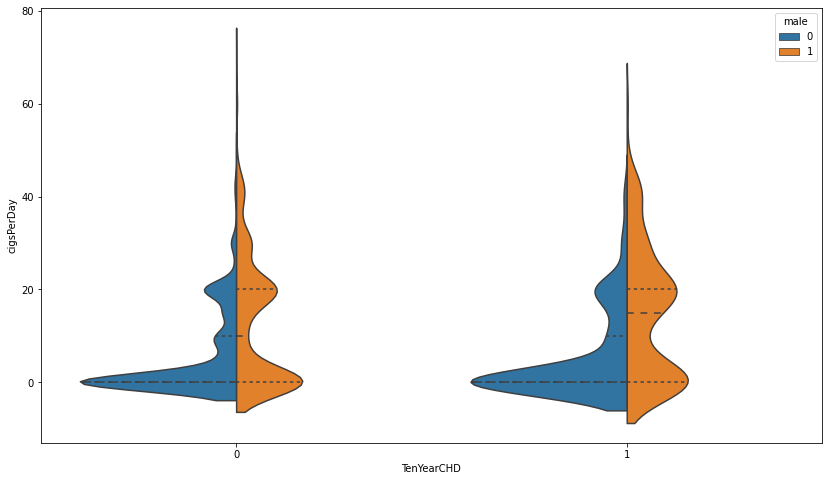

In [21]:
plt.figure(figsize=[14,8])
sns.violinplot(data=df, x='TenYearCHD', y='cigsPerDay', hue='male', inner='quartile', split=True)

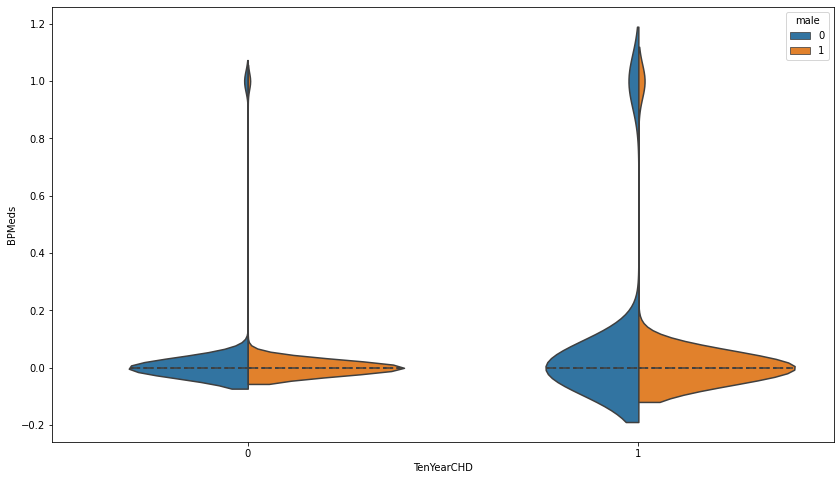

In [22]:
plt.figure(figsize=[14,8])
sns.violinplot(data=df, x='TenYearCHD', y='BPMeds', hue='male', inner='quartile', split=True)

# **Step 3. Data Preparation**

In [23]:
# null values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [24]:
# replacing null values with the mean of their respective columns
education_mean = df['education'].mean()
cigs_mean = df['cigsPerDay'].mean()
bp_mean = df['BPMeds'].mean()
chol_mean = df['totChol'].mean()
bmi_mean = df['BMI'].mean()
heart_mean = df['heartRate'].mean()
glucose_mean = df['glucose'].mean()

values = {'education': education_mean, 'cigsPerDay': cigs_mean, 'BPMeds': bp_mean, 
          'totChol': chol_mean, 'BMI': bmi_mean, 'heartRate': heart_mean, 'glucose': glucose_mean}

df.fillna(value=values, inplace=True)

In [25]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

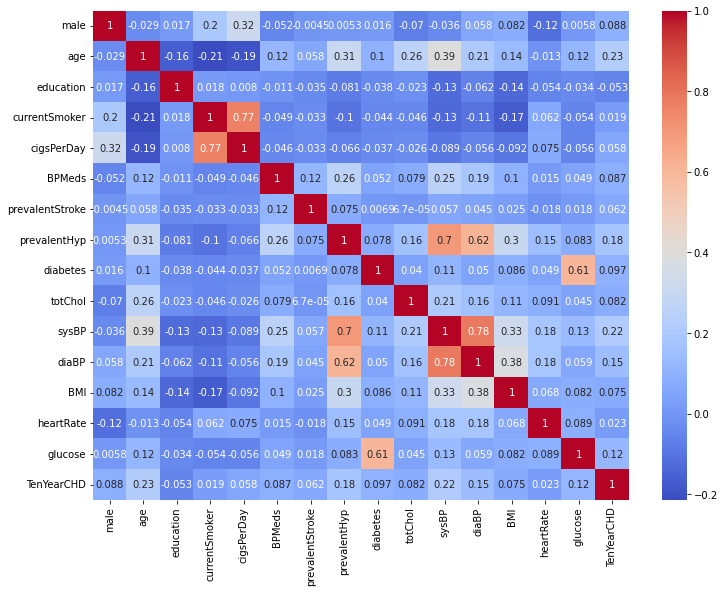

In [26]:
# checking for multicollenearity
plt.figure(figsize=[12,9])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [27]:
# calculalting vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
    
  X =dataframe

  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns

  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

check_vif(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


            feature         VIF
0              male    2.099164
1               age   41.408914
2         education    4.752988
3     currentSmoker    4.856610
4        cigsPerDay    4.173097
5            BPMeds    1.133746
6   prevalentStroke    1.026828
7      prevalentHyp    2.405420
8          diabetes    1.569327
9           totChol   31.494184
10            sysBP  138.197312
11            diaBP  136.215579
12              BMI   45.140267
13        heartRate   38.845327
14          glucose   21.069910
15       TenYearCHD    1.288489


In [28]:
# lets see how removing diaBP column turns out in vif scores
check_vif(df.drop(['diaBP', 'glucose', 'currentSmoker'], axis=1))

            feature        VIF
0              male   2.044037
1               age  40.435957
2         education   4.618995
3        cigsPerDay   1.862624
4            BPMeds   1.132413
5   prevalentStroke   1.026426
6      prevalentHyp   2.335850
7          diabetes   1.047181
8           totChol  31.140550
9             sysBP  71.258743
10              BMI  40.258841
11        heartRate  35.910195
12       TenYearCHD   1.283261


## We cannot remove or transfrom more columns to lower vif score as they all are equally important

In [29]:
# creating copy
df_1 = df.copy()

In [30]:
# removing diaBP, glucose and current smoker columns
df.drop(['diaBP', 'glucose', 'currentSmoker'], axis=1, inplace=True)

In [31]:
# seperating variables
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

In [32]:
# train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# **Step 4. Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [34]:
# getting model coeff and intercept
print(clf.intercept_)
print(clf.coef_)

[-8.26582032]
[[5.32941906e-01 6.37886851e-02 8.86267742e-03 2.01236219e-02
  1.48767036e-01 1.11657313e+00 1.40907462e-01 6.97382890e-01
  1.07339676e-03 1.51930855e-02 1.37178232e-02 2.06494970e-04]]


In [36]:
# getting predicted classes
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [37]:
# performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# accuracy
train_accuracy = accuracy_score(train_preds, y_train)
test_accuracy = accuracy_score(test_preds, y_test)

print('The accuracy for training data is {}'.format(train_accuracy))
print('The accuracy for testing data is {}'.format(test_accuracy))

The accuracy for training data is 0.854940213971051
The accuracy for testing data is 0.8443396226415094


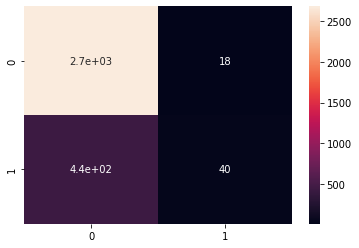

In [38]:
# confusion matrix
matrix_train = confusion_matrix(y_train, train_preds)
sns.heatmap(matrix_train, annot=True)

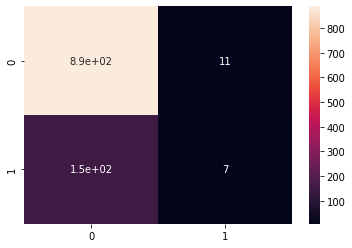

In [39]:
matrix_test = confusion_matrix(y_test, test_preds)
sns.heatmap(matrix_test, annot=True)

In [40]:
# comparing precision and recall for train and test data

# precision recall for train
train_TP = matrix_train[0][0]
train_FP = matrix_train[0][1]
train_FN = matrix_train[1][0]
train_TN = matrix_train[1][1]

train_precision = train_TP/(train_TP+train_FP)
train_recall = train_TP/(train_TP+train_FN)

# precision recall for test
test_TP = matrix_test[0][0]
test_FP = matrix_test[0][1]
test_FN = matrix_test[1][0]
test_TN = matrix_test[1][1]

test_precision = test_TP/(test_TP+test_FP)
test_recall = test_TP/(test_TP+test_FN)

print('Recall for train and test data is: {}, {}'.format(round(train_recall, 4), round(test_recall, 4)))
print('Precision for train and test data is: {}, {}'.format(round(train_precision, 4), round(test_precision, 4)))

Recall for train and test data is: 0.858, 0.8522
Precision for train and test data is: 0.9933, 0.9878
